In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./adult.csv')

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## Cleaning Data

From data we can see that there is special character '?' is used inplace of NaN which indicates null value

In [6]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
data[data == '?'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


- We can see that the columns workclass, occupation, and native.country contains null values. We would have to find out a way to deal with them!
- There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using mode!

In [8]:
for col in ['workclass', 'occupation', 'native-country']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [9]:
data.loc[: , ['education' , 'educational-num']].value_counts()

education     educational-num
HS-grad       9                  15784
Some-college  10                 10878
Bachelors     13                  8025
Masters       14                  2657
Assoc-voc     11                  2061
11th          7                   1812
Assoc-acdm    12                  1601
10th          6                   1389
7th-8th       4                    955
Prof-school   15                   834
9th           5                    756
12th          8                    657
Doctorate     16                   594
5th-6th       3                    509
1st-4th       2                    247
Preschool     1                     83
dtype: int64

As we can see education is already encoded 
- we can drop education column

In [10]:
data.drop('education', axis=1, inplace=True)

## EDA

In [11]:
data.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
eda_percentage = data['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')
eda_percentage

,income,Percentage
0,<=50K,0.760718
1,>50K,0.239282


<AxesSubplot: xlabel='income', ylabel='Percentage'>

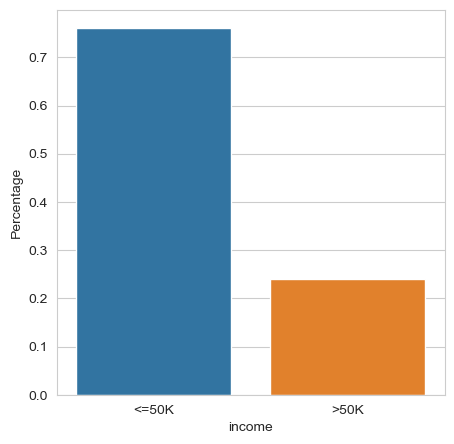

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,5))
sns.barplot(x='income', y='Percentage' ,data=eda_percentage )

## PreProcessing Data

In [14]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status',
       'occupation', 'relationship', 'race', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [15]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [16]:
data['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [18]:
data['relationship'].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
data['race'].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

### Encoding

In [22]:
categorical_features = ['workclass'  ,'marital-status' , 'relationship' , 'race' ,'gender' ,
                        'native-country' , 'occupation']

In [23]:
def get_unique(df, columns):
    categorical_unique={}
    for column in columns:
        categorical_unique[column] = list(df[column].unique())
    return categorical_unique

In [24]:
get_unique(data , categorical_features)

{'workclass': ['Private',
  'Local-gov',
  'Self-emp-not-inc',
  'Federal-gov',
  'State-gov',
  'Self-emp-inc',
  'Without-pay',
  'Never-worked'],
 'marital-status': ['Never-married',
  'Married-civ-spouse',
  'Widowed',
  'Divorced',
  'Separated',
  'Married-spouse-absent',
  'Married-AF-spouse'],
 'relationship': ['Own-child',
  'Husband',
  'Not-in-family',
  'Unmarried',
  'Wife',
  'Other-relative'],
 'race': ['Black',
  'White',
  'Asian-Pac-Islander',
  'Other',
  'Amer-Indian-Eskimo'],
 'gender': ['Male', 'Female'],
 'native-country': ['United-States',
  'Peru',
  'Guatemala',
  'Mexico',
  'Dominican-Republic',
  'Ireland',
  'Germany',
  'Philippines',
  'Thailand',
  'Haiti',
  'El-Salvador',
  'Puerto-Rico',
  'Vietnam',
  'South',
  'Columbia',
  'Japan',
  'India',
  'Cambodia',
  'Poland',
  'Laos',
  'England',
  'Cuba',
  'Taiwan',
  'Italy',
  'Canada',
  'Portugal',
  'China',
  'Nicaragua',
  'Honduras',
  'Iran',
  'Scotland',
  'Jamaica',
  'Ecuador',
  'Yugosl

In [25]:
binary_features = ['gender']
nominal_features = ['workclass'  ,'marital-status' , 'relationship' , 'race' ,'native-country' , 'occupation']

In [26]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split 

In [28]:
def binaryEncode(df, columns):
    df = df.copy()
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df


def nominalEncoder(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1 ,inplace=True)
    return df

In [29]:
data = binaryEncode(data, binary_features)
data = nominalEncoder(data, nominal_features)

In [30]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,25,226802,7,1,0,0,40,<=50K,0,0,...,0,0,1,0,0,0,0,0,0,0
1,38,89814,9,1,0,0,50,<=50K,0,0,...,1,0,0,0,0,0,0,0,0,0
2,28,336951,12,1,0,0,40,>50K,0,1,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
4,18,103497,10,0,0,0,30,<=50K,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,201490,9,1,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         48842 non-null  int64 
 1   fnlwgt                      48842 non-null  int64 
 2   educational-num             48842 non-null  int64 
 3   gender                      48842 non-null  int64 
 4   capital-gain                48842 non-null  int64 
 5   capital-loss                48842 non-null  int64 
 6   hours-per-week              48842 non-null  int64 
 7   income                      48842 non-null  object
 8   Federal-gov                 48842 non-null  uint8 
 9   Local-gov                   48842 non-null  uint8 
 10  Never-worked                48842 non-null  uint8 
 11  Private                     48842 non-null  uint8 
 12  Self-emp-inc                48842 non-null  uint8 
 13  Self-emp-not-inc            48842 non-null  ui